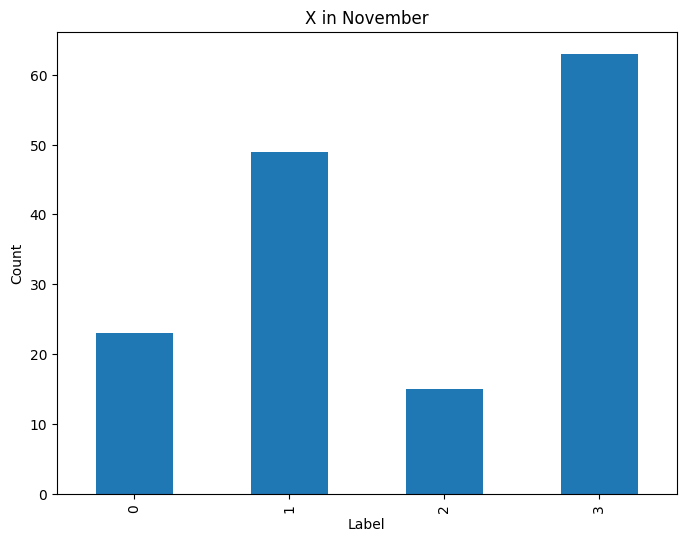

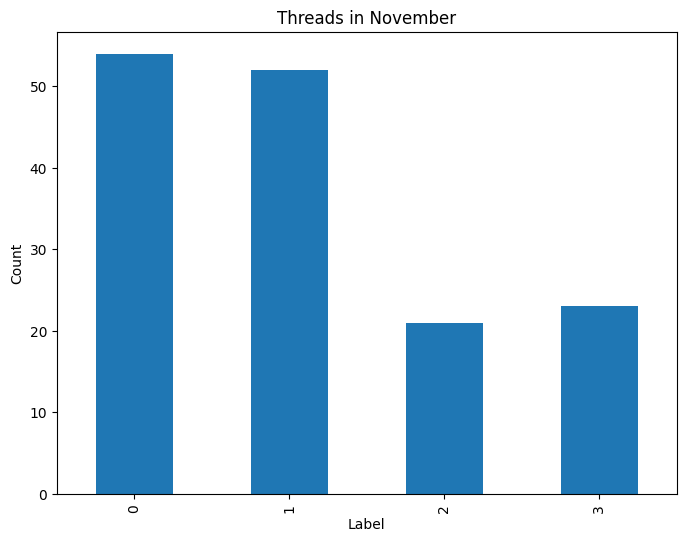

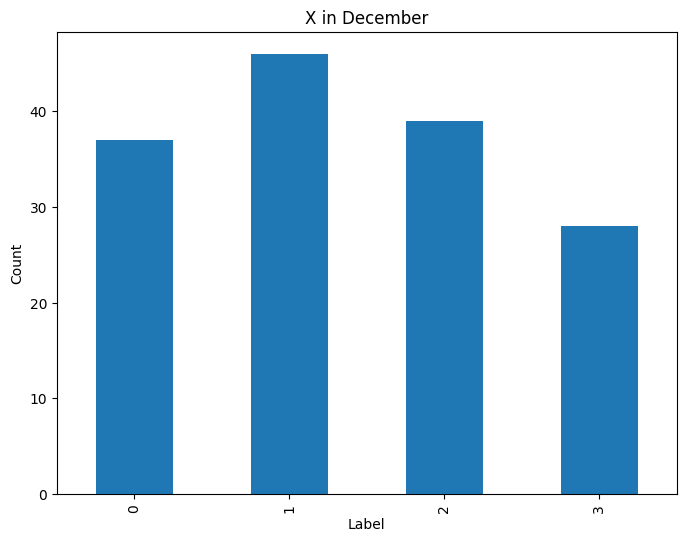

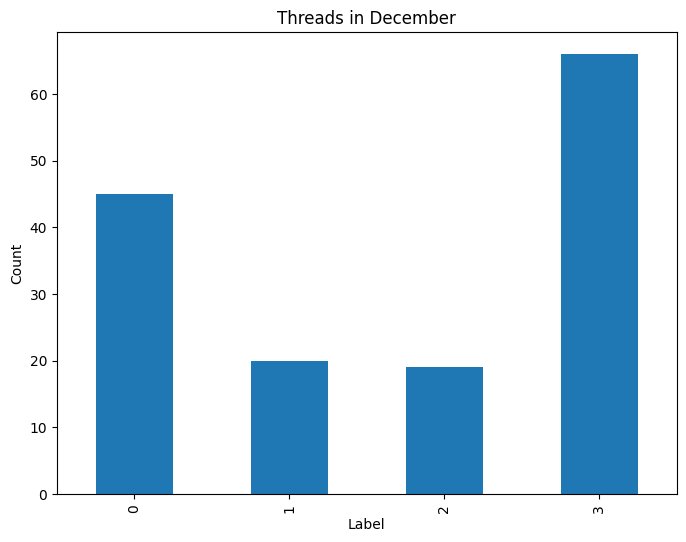

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded dataset
file_path_uploaded = 'analisis.xlsx'
uploaded_df = pd.read_excel(file_path_uploaded)

# Define filters for each month and platform
data_filters = {
    "X in November": (uploaded_df['social'] == 'X') & (uploaded_df['time'] == 11),
    "Threads in November": (uploaded_df['social'] == 'Threads') & (uploaded_df['time'] == 11),
    "X in December": (uploaded_df['social'] == 'X') & (uploaded_df['time'] == 12),
    "Threads in December": (uploaded_df['social'] == 'Threads') & (uploaded_df['time'] == 12),
}

# Generate charts for each filter
for title, filter_condition in data_filters.items():
    filtered_data = uploaded_df[filter_condition]
    label_counts = filtered_data['label'].value_counts().sort_index()
    label_counts.plot(kind='bar', figsize=(8, 6), title=title, xlabel='Label', ylabel='Count')
    plt.xticks([0, 1, 2, 3])  # Ensure correct labels
    plt.show()


In [ ]:
label_summary = uploaded_df.groupby(['time', 'social', 'label']).size().reset_index(name='count')

label_summary_pivot = label_summary.pivot_table(
    index=['time', 'social'],
    columns='label',
    values='count',
    fill_value=0
)

label_summary_pivot.columns = [f'Label {col}' for col in label_summary_pivot.columns]

print(label_summary_pivot)

              Label 0  Label 1  Label 2  Label 3
time social                                     
11   Threads     54.0     52.0     21.0     23.0
     X           23.0     49.0     15.0     63.0
12   Threads     45.0     20.0     19.0     66.0
     X           37.0     46.0     39.0     28.0
